# CS 470 Homework 1 

In [166]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

dataset = pd.read_csv("grades.csv")
dataset.head()

,Semester,Student ID,Name,Section,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Peer Evaluations,...,Quiz 09,Quiz 10,Quiz 11,Quiz 12,Quiz Adjustment,Drop Lowest Quiz 1,Drop Lowest Quiz 2,Final Exam,Total Score,Letter Grade
0,F18,457364,Youyang,8,32.0,40.0,34.0,34.0,42.0,150.0,...,36.0,40.0,47.0,13.0,NaN,-13,-22.0,123.0,841.0,B
1,F18,950536,Tait,2,35.0,40.0,34.0,32.0,40.0,150.0,...,15.0,39.0,46.0,46.0,NaN,0,-15.0,99.0,773.5,C+
2,F18,524131,Hafeez,1,39.0,40.0,42.0,29.0,42.0,150.0,...,27.0,41.0,40.0,8.0,NaN,-8,-19.0,117.0,834.0,B
3,F18,791499,Madhura,4,38.0,40.0,37.0,34.0,40.0,NaN,...,18.0,23.0,30.0,34.0,NaN,-18,-23.0,117.0,696.0,D+
4,F18,273342,Jeeyong,1,38.0,40.0,42.0,38.0,42.0,150.0,...,34.0,38.0,50.0,47.0,NaN,-34,-38.0,132.0,956.0,A


## Task 2: Missing Values

The snippet of code below tries to find rows with missing values

In [80]:
msv = pd.DataFrame(columns = ['Attribute', '# Missing'])
for i, column in enumerate(dataset):
    number_missing = len(dataset.loc[pd.isna(dataset[column])].index)
    msv.loc[i] = [column, number_missing]

msv.loc[msv['# Missing'] != 0]

,Attribute,# Missing
4,Homework 1,18
5,Homework 2,17
6,Homework 3,26
7,Homework 4,30
8,Homework 5,43
9,Peer Evaluations,40
10,Bonus,769
11,Quiz 01,17
12,Quiz 02,26
13,Quiz 03,17


NB: The vast majority of the people who have a missing entry for Peer Evaluations failed the course

In [81]:
dataset.loc[dataset["Peer Evaluations"].isna()]['Letter Grade'].value_counts()

F     36
D+     2
C-     2
Name: Letter Grade, dtype: int64

## Task 3: Re-encoding

### Semester

In [167]:
dataset['Fall/Spring'], dataset['Year'] = dataset['Semester'].str.slice(stop=1),'20' + dataset['Semester'].str.slice(start=1)
#dataset = dataset.drop(columns='Semester')
dataset[['Fall/Spring', 'Year']]

# TODO: Change F to Fall

,Fall/Spring,Year
0,F,2018
1,F,2018
2,F,2018
3,F,2018
4,F,2018
...,...,...
779,F,2016
780,F,2016
781,F,2016
782,F,2016


In [168]:
dataset['Fall/Spring'].value_counts()

F    530
S    254
Name: Fall/Spring, dtype: int64

### Section

In [169]:
dataset['Section']

0      8
1      2
2      1
3      4
4      1
      ..
779    4
780    3
781    3
782    1
783    8
Name: Section, Length: 784, dtype: int64

In [170]:
dataset['Section'].apply(str)

0      8
1      2
2      1
3      4
4      1
      ..
779    4
780    3
781    3
782    1
783    8
Name: Section, Length: 784, dtype: object

In [171]:
dataset['Lab Section'] = dataset['Year'] + dataset['Fall/Spring'].apply(str) + '-section' + dataset['Section'].apply(str)
# Alternative, does not include Year + Semester in Section
# dataset['Lab Section'] = 'section' + dataset['Section'].apply(str)
dataset = dataset.drop(columns = 'Section')

In [172]:
dataset['Fall/Spring'] = pd.Categorical(dataset['Fall/Spring'], ["S", "F"])

In [173]:
dataset['Lab Section'].value_counts()

2018S-section5    27
2017F-section4    27
2016F-section0    27
2016F-section1    26
2017S-section0    26
2018S-section4    26
2018S-section1    26
2016F-section2    26
2018F-section4    25
2018S-section2    24
2017F-section9    24
2018F-section7    23
2017S-section2    23
2016F-section9    23
2018F-section6    23
2018S-section3    22
2017F-section7    22
2016F-section4    22
2017S-section1    22
2016F-section3    22
2017F-section5    22
2017F-section2    22
2018S-section6    21
2017F-section3    21
2018F-section3    21
2016F-section7    21
2017F-section8    18
2018F-section5    18
2017S-section3    17
2016F-section6    16
2017F-section6    14
2016F-section8    13
2018F-section2    13
2018F-section8    12
2017F-section1    12
2017S-section4    11
2018F-section1     9
2017S-section5     9
2018F-section9     8
Name: Lab Section, dtype: int64

## Task 4: Scaling and z-scoring

In [89]:
# score_columns = []
# 
# for i in range(1,6):
#     score_columns.append(f'Homework {i}')
# score_columns.append('Peer Evaluations')
# for i in range(1,13):
#     score_columns.append(f'Quiz {i:02}')
# score_columns.append('Final Exam')
# 
# dataset[score_columns]

In [174]:
dataset['Homework 1'].describe()

count    766.000000
mean      37.784595
std        7.251365
min        0.000000
25%       37.000000
50%       40.000000
75%       42.000000
max       44.000000
Name: Homework 1, dtype: float64

In [175]:
# Change 44s to 42 for homework assignments
for i in range(1, 6):
    dataset.loc[dataset[f'Homework {i}'] > 42, f'Homework {i}'] = 42

In [176]:
for i in range(1, 6):
    dataset[f'Homework {i} Scaled'] = dataset[f'Homework {i}'].apply(lambda x: x*100./40.)
dataset['Peer Evaluations Scaled'] = dataset['Peer Evaluations'].apply(lambda x: x*100./150.)
for j in range(1, 13):
    quiz = f'Quiz {i:02}'
    dataset[f'{quiz} Scaled'] = dataset[quiz].apply(lambda x: x*100./50.)
dataset['Final Exam Scaled'] = dataset['Final Exam'].apply(lambda x: x*100./150.)
dataset['Total Score Scaled'] = dataset['Total Score'].apply(lambda x: x*100./1000.)

In [177]:
dataset['Final Exam Scaled'].describe()

count    743.000000
mean      73.033647
std       14.047578
min       16.000000
25%       66.000000
50%       76.000000
75%       84.000000
max       98.000000
Name: Final Exam Scaled, dtype: float64

In [178]:
for i in range(1, 6):
    hw = f'Homework {i}'
    dataset[f'{hw} Z-Score All Semesters'] = (dataset[hw] - dataset[hw].mean())/dataset[hw].std(ddof=0)

dataset['Peer Evaluations Z-Score All Semesters'] = (dataset['Peer Evaluations'] - dataset['Peer Evaluations'].mean())/dataset['Peer Evaluations'].std(ddof=0)

for j in range(1, 13):
    quiz = f'Quiz {i:02}'
    dataset[f'{quiz} Z-Score All Semesters'] = (dataset[quiz] - dataset[quiz].mean())/dataset[quiz].std(ddof=0)

dataset['Final Exam Z-Score All Semesters'] = (dataset['Final Exam'] - dataset['Final Exam'].mean())/dataset['Final Exam'].std(ddof=0)
dataset['Total Score Z-Score All Semesters'] = (dataset['Total Score'] - dataset['Total Score'].mean())/dataset['Total Score'].std(ddof=0)

In [179]:
dataset['Final Exam Z-Score All Semesters'].describe()

count    7.430000e+02
mean    -6.328122e-17
std      1.000674e+00
min     -4.062769e+00
25%     -5.010391e-01
50%      2.113069e-01
75%      7.811838e-01
max      1.778468e+00
Name: Final Exam Z-Score All Semesters, dtype: float64

In [182]:
for semester in dataset['Semester'].unique():
    for i in range(1,6):
        hw = f'Homework {i}'
        mean = dataset.groupby('Semester').mean()[hw][semester]
        std = dataset.groupby('Semester').std(ddof=0)[hw][semester]
        dataset[f'{hw} Z-Score Same Semesters'].loc[dataset['Semester'] == semester] = (dataset[hw].loc[dataset['Semester'] == semester] - mean)/std
    
    mean = dataset.groupby('Semester').mean()['Peer Evaluations'][semester]
    std = dataset.groupby('Semester').std(ddof=0)['Peer Evaluations'][semester]
    dataset['Peer Evaluations Z-Score Same Semesters'].loc[dataset['Semester'] == semester] = (dataset['Peer Evaluations'].loc[dataset['Semester'] == semester] - mean)/std

    for j in range(1, 13):
        quiz = f'Quiz {j:02}'
        mean = dataset.groupby('Semester').mean()[quiz][semester]
        std = dataset.groupby('Semester').std(ddof=0)[quiz][semester]
        dataset[f'{quiz} Z-Score Same Semesters'].loc[dataset['Semester'] == semester] = (dataset[quiz].loc[dataset['Semester'] == semester] - mean)/std
    
    mean = dataset.groupby('Semester').mean()['Final Exam'][semester]
    std = dataset.groupby('Semester').std(ddof=0)['Final Exam'][semester]
    dataset['Final Exam Z-Score Same Semesters'].loc[dataset['Semester'] == semester] = (dataset['Final Exam'].loc[dataset['Semester'] == semester] - mean)/std
    
    mean = dataset.groupby('Semester').mean()['Total Score'][semester]
    std = dataset.groupby('Semester').std(ddof=0)['Total Score'][semester]
    dataset['Total Score Z-Score Same Semesters'].loc[dataset['Semester'] == semester] = (dataset['Total Score'].loc[dataset['Semester'] == semester] - mean)/std

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [183]:
dataset['Homework 1 Z-Score Same Semesters']

0     -0.869845
1     -0.421804
2      0.175584
3      0.026237
4      0.026237
         ...   
779    0.715799
780   -0.143160
781    0.501060
782   -0.143160
783    0.393690
Name: Homework 1 Z-Score Same Semesters, Length: 784, dtype: float64

## Task 5: Summary Statistics

In [97]:
def seven_stats(attribute):
    entry = dataset[attribute]
    return [attribute, entry.mean(), 
            entry.std(ddof=0),entry.min(), 
            entry.quantile(0.25), entry.median(), 
            entry.quantile(0.75), entry.max()]

summ_stat_list = []

for i in range(1,6):
    summ_stat_list.append(seven_stats(f'Homework {i}'))
summ_stat_list.append(seven_stats('Peer Evaluations'))
for i in range(1,13):
    summ_stat_list.append(seven_stats(f'Quiz {i:02}'))
summ_stat_list.append(seven_stats('Final Exam'))

summary_statistics = pd.DataFrame(summ_stat_list, columns=['Attribute', 'Mean', 'Std Dev', 'Min', 'Q1', 'Median', 'Q3', 'Max'])
summary_statistics

,Attribute,Mean,Std Dev,Min,Q1,Median,Q3,Max
0,Homework 1,37.646214,7.146465,0.0,37.0,40.0,42.0,42.0
1,Homework 2,37.859192,6.228671,0.0,37.0,40.0,41.0,42.0
2,Homework 3,37.339050,6.788733,-7.0,36.0,40.0,42.0,42.0
3,Homework 4,37.828912,6.618731,-3.0,37.0,40.0,42.0,42.0
4,Homework 5,39.784076,6.208202,0.0,40.0,42.0,42.0,42.0
5,Peer Evaluations,146.591263,16.174448,1.0,150.0,150.0,150.0,150.0
6,Quiz 01,38.649283,11.306772,5.0,30.0,43.0,49.0,50.0
7,Quiz 02,42.769129,9.904997,0.0,39.0,46.0,50.0,50.0
8,Quiz 03,34.319426,10.792142,1.0,28.0,37.0,42.0,50.0
9,Quiz 04,41.817819,8.487322,0.0,39.0,45.0,48.0,50.0


In [98]:
summary_statistics.to_csv('summary_statistics.csv')

## Task 6: Charts

 % of people that passed  
 Among those that passed ---

In [99]:
import matplotlib.pyplot as plt
plt.rcdefaults()

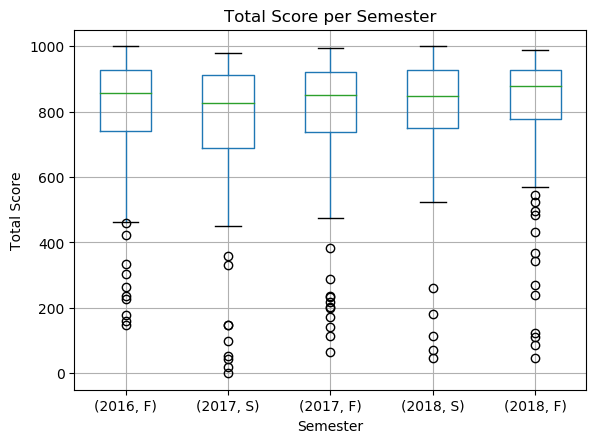

In [100]:
dataset.boxplot(column = 'Total Score', by=['Year', 'Fall/Spring'])
plt.ylabel('Total Score')
plt.xlabel('Semester')
plt.title('Total Score per Semester')
plt.suptitle('')
plt.savefig('graph0.png')
plt.show()

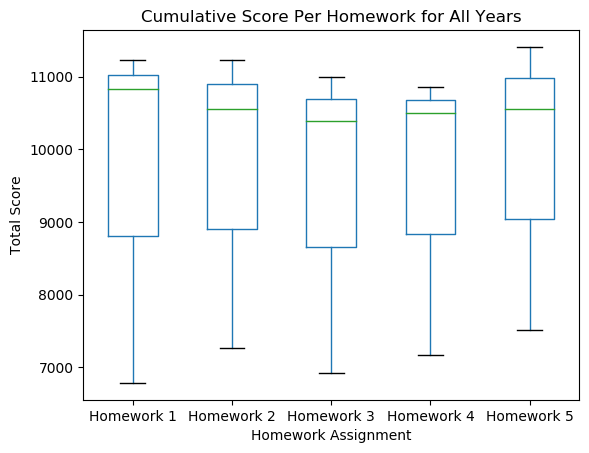

In [101]:
# .sum().sum(axis=1)
# Variation of Homework grades for all years
all_homeworks = [f'Homework {i}' for i in range(1, 6)]
dataset.groupby('Year')[all_homeworks].sum(axis = 1).plot(kind = 'box')
plt.ylabel('Total Score')
plt.xlabel('Homework Assignment')
plt.title('Cumulative Score Per Homework for All Years')
plt.suptitle('')
plt.savefig('graph1.png')
plt.show()

In [102]:
dataset['All Homeworks'] =  dataset[all_homeworks].sum(axis=1)

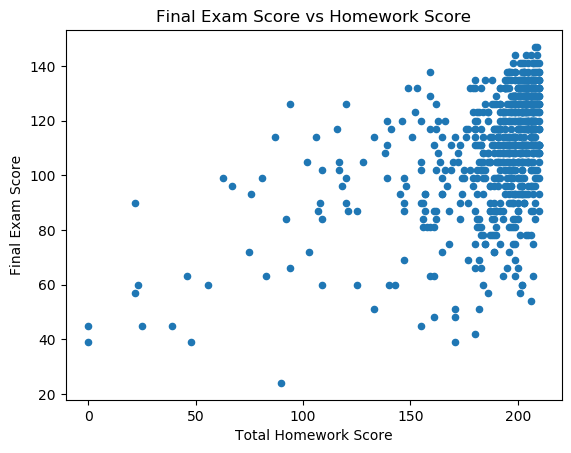

In [103]:
dataset.plot(x = 'All Homeworks', y = 'Final Exam', kind = 'scatter')
plt.ylabel('Final Exam Score')
plt.xlabel('Total Homework Score')
plt.title('Final Exam Score vs Homework Score')
plt.suptitle('')
plt.savefig('graph2.png')
plt.show()

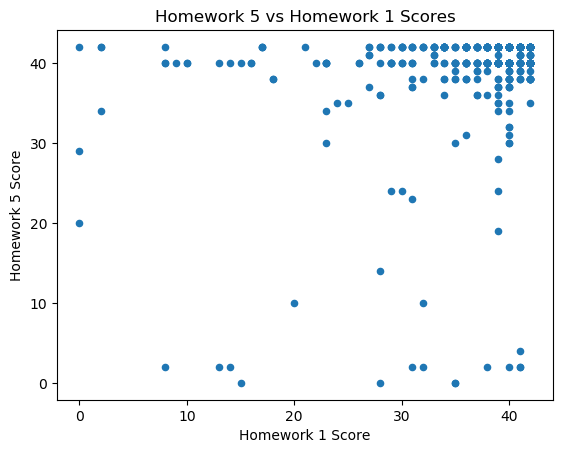

In [104]:
dataset.plot(x = 'Homework 1', y = 'Homework 5', kind = 'scatter')
plt.ylabel('Homework 5 Score')
plt.xlabel('Homework 1 Score')
plt.title('Homework 5 vs Homework 1 Scores')
plt.suptitle('')
plt.savefig('graph3.png')
plt.show()

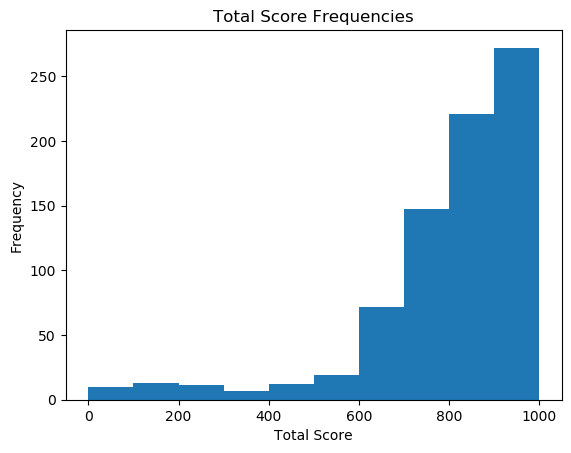

In [112]:
dataset['Total Score'].plot(kind='hist')
plt.xlabel('Total Score')
plt.title('Total Score Frequencies')
plt.suptitle('')
plt.savefig('graph4.png')
plt.show()

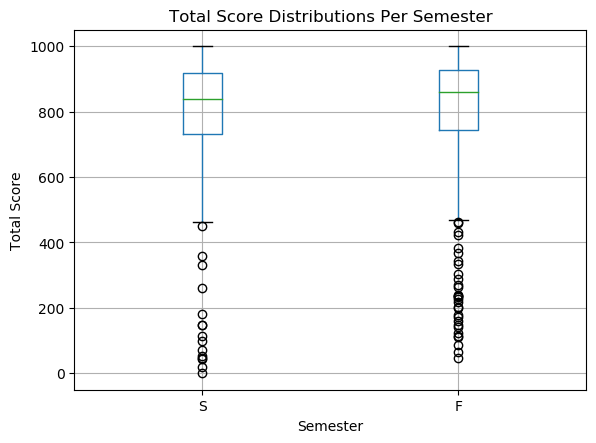

In [106]:
dataset.boxplot(by = 'Fall/Spring', column= 'Total Score')
plt.ylabel('Total Score')
plt.xlabel('Semester')
plt.title('Total Score Distributions Per Semester')
plt.suptitle('')
plt.savefig('graph5.png')
plt.show()

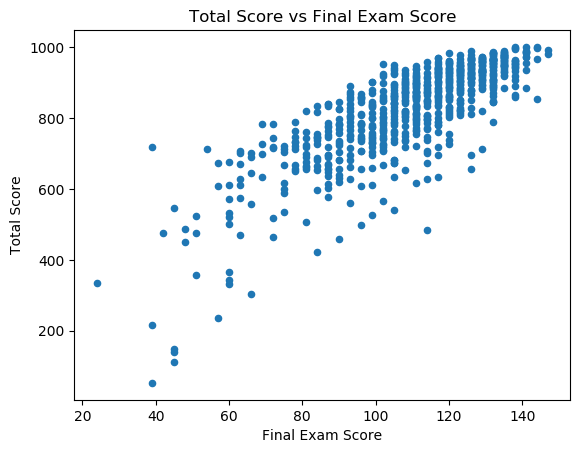

In [107]:
dataset.plot(x='Final Exam', y='Total Score', kind='scatter')
plt.xlabel('Final Exam Score')
plt.ylabel('Total Score')
plt.title('Total Score vs Final Exam Score')
plt.suptitle('')
plt.savefig('graph6.png')
plt.show()

In [108]:
dataset['Final Exam'].corr(dataset['Total Score'])

0.8132413472122629

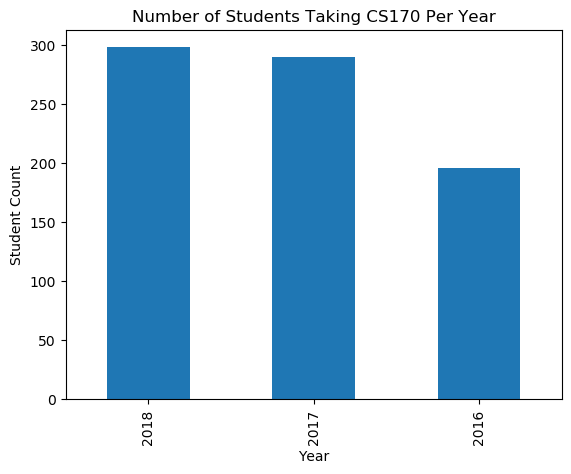

In [109]:
dataset['Year'].value_counts().plot(kind = 'bar')
plt.ylabel('Student Count')
plt.xlabel('Year')
plt.title('Number of Students Taking CS170 Per Year')
plt.suptitle('')
plt.savefig('graph7.png')
plt.show()

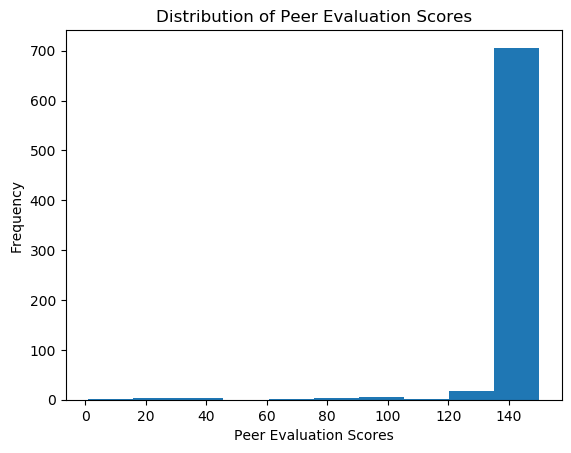

In [110]:
dataset['Peer Evaluations'].plot(kind = 'hist')
plt.xlabel('Peer Evaluation Scores')
plt.title('Distribution of Peer Evaluation Scores')
plt.savefig('graph8.png')
plt.show()

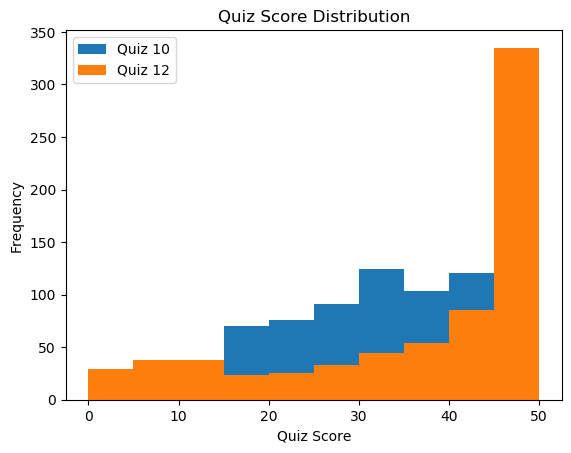

In [121]:
dataset[['Quiz 10', 'Quiz 12']].plot(kind = 'hist')
plt.xlabel('Quiz Score')
plt.title('Quiz Score Distribution')
plt.savefig('graph9.png')
plt.show()

In [ ]:
dataset



## Cleanup

In [185]:
#del dataset['All Homeworks']
del dataset['Semester']

dataset.to_csv('grades_modified.csv')

# Maybe use a Seaborn heatmap